In [6]:
import os
os.chdir('..')

In [3]:
from pathlib import Path
import json

# Paths

In [13]:
coco_train_path = Path('data')/'benign_data'/'coco_train.json'
coco_test_path = Path('data')/'benign_data'/'coco_test.json'
coco_eval_path = Path('data')/'benign_data'/'coco_eval.json'

data_dir = Path('data')/'benign_data'
eval_coco_path = data_dir/'coco_eval.json'
eval_img_dir = data_dir/'eval_imgs'

eval_dir = Path('output')/'eval'
rcnn_annos_path = eval_dir/'rcnn'/'eval_annos_rcnn.json'
retina_annos_path = eval_dir/'retina'/'eval_annos_retina.json'

yolo_annos_path = eval_dir/'eval_annos_yolo_1.json'

---

In [4]:
with coco_test_path.open('r') as f:
    coco_test = json.load(f)

with coco_train_path.open('r') as f:
    coco_train = json.load(f)

with coco_eval_path.open('r') as f:
    coco_eval = json.load(f)

In [5]:
coco_train['categories']

[{'id': 1, 'name': 'box'}, {'id': 2, 'name': 'logo'}]

In [11]:
# for coco in (coco_test, coco_train):
#     for anno in coco['annotations']:
#         anno['iscrowd'] = 0

In [6]:
for anno in coco_eval['annotations']:
    anno['iscrowd'] = 0

In [7]:
# with coco_test_path.open('w') as f:
#     json.dump(coco_test, f)

# with coco_train_path.open('w') as f:
#     json.dump(coco_train, f)

with coco_eval_path.open('w') as f:
    json.dump(coco_eval, f)

# Viz

In [5]:
import os
os.chdir('..')

In [19]:
import detectron2_1

In [20]:
from detectron2.config import get_cfg
from pathlib import Path
from detectron2.engine import DefaultPredictor
import cv2
from detectron2.data import MetadataCatalog
from detectron2.utils.visualizer import Visualizer
from PIL import Image

In [46]:
img_dir = Path('data')
img_path = img_dir/'samples'/'WechatIMG18.png'
save_path = img_dir/'samples'/'WechatIMG18_pred.png'

model_dir = Path('output')
rcnn_dir = model_dir/'rcnn_2'
rcnn_cfg_path = rcnn_dir/'config.yaml'
rcnn_weights_path = rcnn_dir/'model_final.pth'



In [16]:
im = cv2.imread(str(img_path))

In [109]:
cfg = get_cfg()
cfg.merge_from_file(rcnn_cfg_path)
cfg.MODEL.WEIGHTS = str(rcnn_weights_path)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.03


In [110]:
predictor = DefaultPredictor(cfg)

In [111]:
outputs = predictor(im)

In [112]:
benign_metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes = ["box", "logo"]

In [113]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

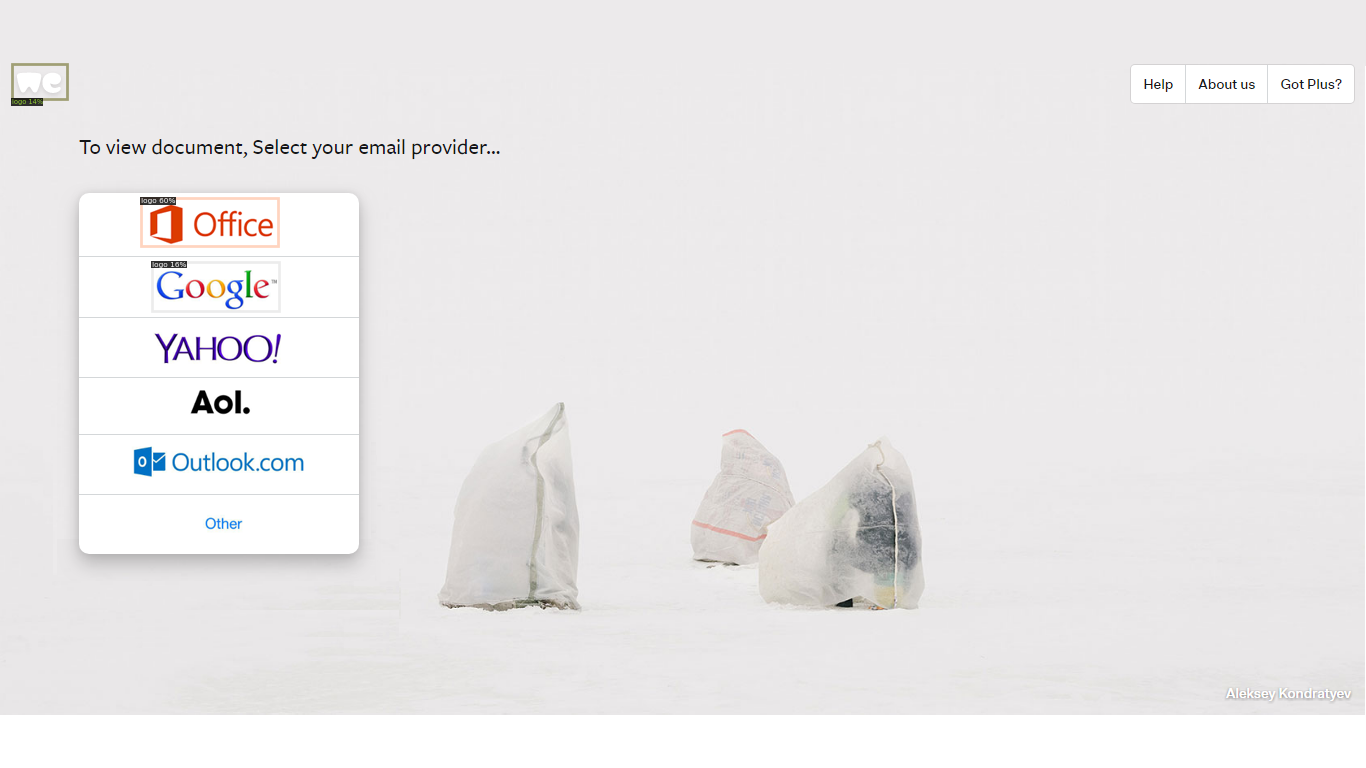

In [114]:
Image.fromarray(out.get_image())

In [96]:
Image.fromarray(out.get_image()).save(save_path)

# Evaluation

In [14]:
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import numpy as np
import skimage.io as io
import pylab

In [15]:
cocoGt = COCO(eval_coco_path)


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [16]:
cocoDt = cocoGt.loadRes(str(yolo_annos_path))

Loading and preparing results...
DONE (t=0.08s)
creating index...
index created!


In [17]:
cocoEval = COCOeval(cocoGt, cocoDt, 'bbox')
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()


Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.88s).
Accumulating evaluation results...
DONE (t=0.18s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.018
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.016
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.081
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.109
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.110
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100